# Import libraries

In [1]:
import pandas as pd
import torch
import matplotlib.pyplot as plt
from scipy.spatial.distance import cosine

from transformers import BertTokenizer, BertModel
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased', output_hidden_states=True)
model.eval()

C:\Users\Savannah\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Savannah\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Savannah\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Savannah\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:529: FutureWa

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0): BertLayer(
        (attention): BertAttention(
          (self): BertSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False)
          

# Load survey data

In [3]:
# Read it in
path = "../data/surveys_clean.csv"
df = pd.read_csv(path, na_filter=False)

# Compare response lengths

In [4]:
# Group by race
df_black = df[df['racial_group'] == "black"]
df_white = df[df['racial_group'] == "white"]

# Select filtered responses
df_black_race = df_black[df_black['about_race'] > 0]
df_white_race = df_white[df_white['about_race'] > 0]

# Get long responses
res_black = df_black['long'].tolist()
res_black_race = df_black_race['long'].tolist()
res_white = df_white['long'].tolist()
res_white_race = df_white_race['long'].tolist()

Text(0.5, 1.0, 'Num Sentences, White, filtered')

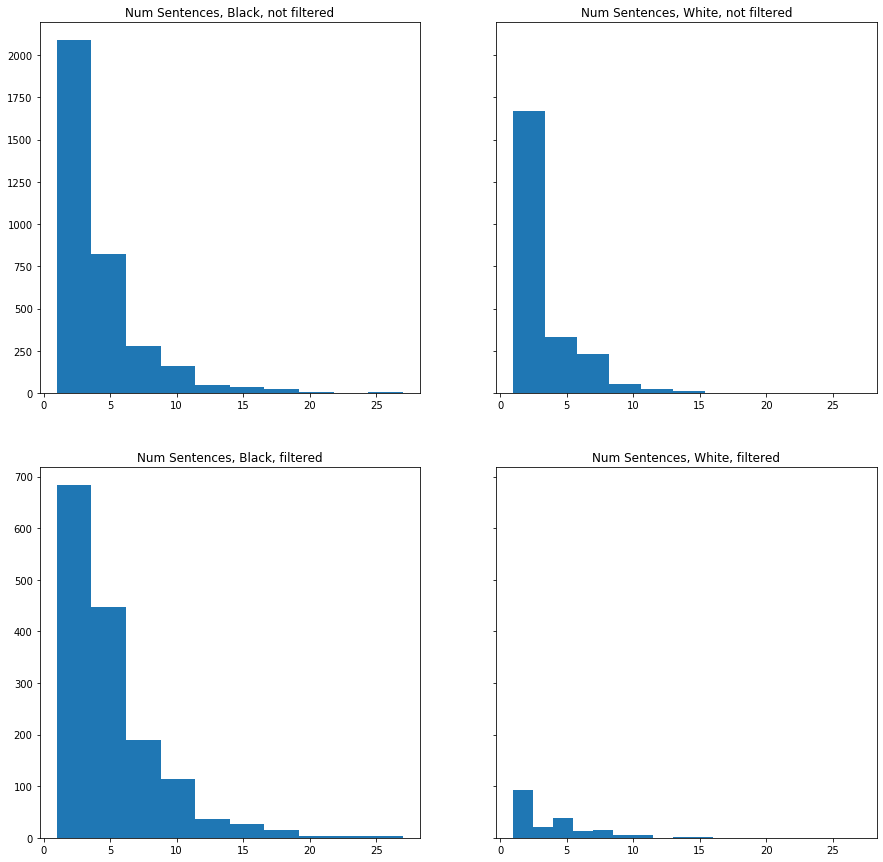

In [16]:
fig, axs = plt.subplots(2,2, sharex="row", sharey="row", figsize=(15,15))

num_sen = [len(r.split(". ")) for r in res_black]
axs[0][0].hist(num_sen)
axs[0][0].set_title("Num Sentences, Black, not filtered")

num_sen = [len(r.split(". ")) for r in res_white]
axs[0][1].hist(num_sen)
axs[0][1].set_title("Num Sentences, White, not filtered")

num_sen = [len(r.split(". ")) for r in res_black_race]
axs[1][0].hist(num_sen)
axs[1][0].set_title("Num Sentences, Black, filtered")

num_sen = [len(r.split(". ")) for r in res_white_race]
axs[1][1].hist(num_sen)
axs[1][1].set_title("Num Sentences, White, filtered")

Text(0.5, 1.0, 'Response Lengths, White, filtered')

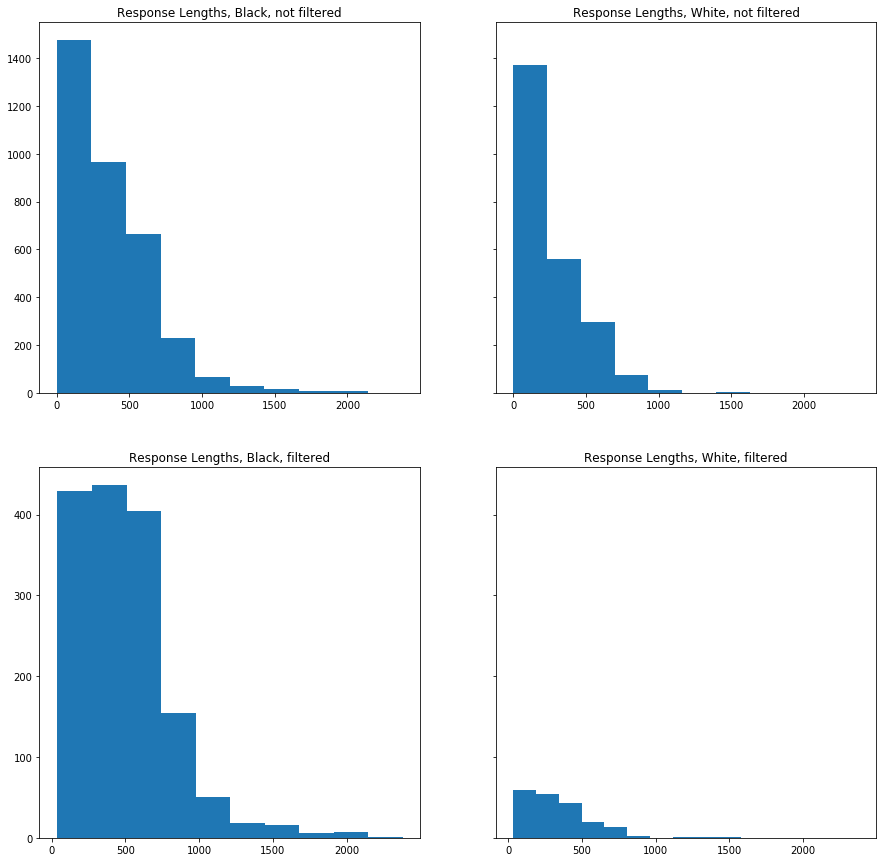

In [17]:
fig, axs = plt.subplots(2,2, sharex="row", sharey="row", figsize=(15,15))
lengths = [len(r) for r in res_black]
axs[0][0].hist(lengths)
axs[0][0].set_title("Response Lengths, Black, not filtered")

lengths = [len(r) for r in res_white]
axs[0][1].hist(lengths)
axs[0][1].set_title("Response Lengths, White, not filtered")

lengths = [len(r) for r in res_black_race]
axs[1][0].hist(lengths)
axs[1][0].set_title("Response Lengths, Black, filtered")

lengths = [len(r) for r in res_white_race]
axs[1][1].hist(lengths)
axs[1][1].set_title("Response Lengths, White, filtered")